# Pulsar Timing Array crash course in noise
Signal to noise, beating down noise, building up signal, cross-correlation

Andrea Lommen

IPTA India 2019

Wednesday 12 June, 2019

This notebook was shown as part of a lecture on pulsar timing arrays. It was designed so that you can:
* Just look at the plots and get the ides
* Look at the code (or even mess with the code) to experiment with things yourself.

If I can be of assistance during the week, please don't hesitate to ask.

# Punchline #1
**When you add pulsars to the array signal accumulates and noise cancels out. ** 

In [1]:
# Import libraries and set sample size
import matplotlib.pyplot as plt
import numpy as np
nsample=500

In [2]:
# Creating 3 pulsars, each with a sinusoidal signal, 150-day period
x=np.arange(0,nsample)
a=2.0*np.sin(x*2*np.pi/150)
b=np.sin(x*2*np.pi/150)
c=.5*(np.sin(x*2*np.pi/150))

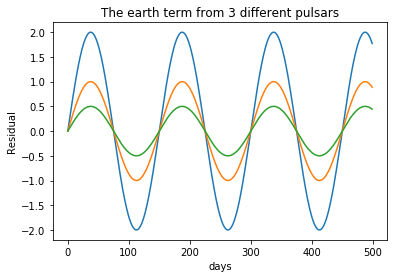

In [3]:
plt.plot(x, a)
plt.plot(x, b)
plt.plot(x, c)
plt.xlabel("days")
plt.ylabel("Residual")
plt.title("The earth term from 3 different pulsars")
plt.savefig("noise2.png")

Now let's add some noise

In [4]:
a += np.random.normal(loc=0, scale=1, size=nsample)
b += np.random.normal(loc=0, scale=1, size=nsample)
c += np.random.normal(loc=0, scale=1, size=nsample)

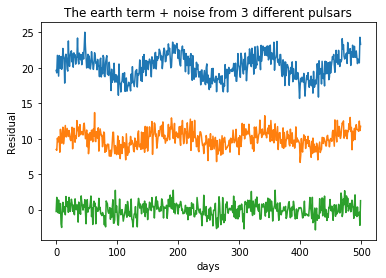

In [5]:
plt.plot(x, a+20)
plt.plot(x, b+10)
plt.plot(x, c)
plt.xlabel("days")
plt.ylabel("Residual")
plt.title("The earth term + noise from 3 different pulsars")
plt.savefig("noise3.png")

Can I still see the signal in there?  Definitely. The signal to noise ratio in the top one is 2 (size of the signal to the size of the RMS of the noise) and in the bottom one is .5.
Let's add them up to see if we can accumulate signal.

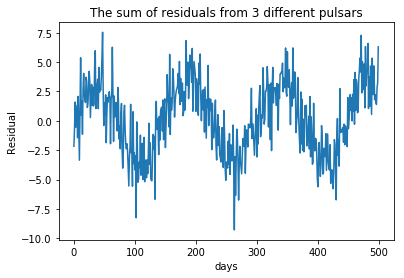

In [6]:
plt.plot(x, a+b+c)
plt.xlabel("days")
plt.ylabel("Residual")
plt.title("The sum of residuals from 3 different pulsars")
plt.savefig("noise4.png")

So that's the basic idea of accumulating signal, and the noise canceling out.  This has a signal to noise ratio of about 5. 

# Punchline #1
**When you add pulsars to the array signal accumulates and noise cancels out.**

# Punchline #2 (because I like to give the punchline away before the joke.)
**Positive correlation means on average the two arrays being correlated both are positive and both are negative at the same time. Negative correlation means if one array is positive, the other is negative, on average.**

So in practice, we don't actually add them up. Rather we use something called cross-correlation. So I take one pulsar's residuals, and multiply them by another one, and then add all those up. Let's practice on two simple arrays, array1 and array2, just to get the hang of this.

In [7]:
# Simple example
array1=np.array([1,-5,10])
array2=np.array([2,-2,2])
# The cross correlation of those two will be......32
print("The cross correlation of array1 and array2 is ", np.sum(array1*array2))

The cross correlation of array1 and array2 is  32


So those two arrays are pretty highly correlated.  That number is pretty big, and positive.

**What does cross-correlation measure?**  It measures whether two arrays are going positive and negative at about the same time.  If it's random, and the two arrays are sometimes both positive, sometimes one is positive and the other negative, and sometimes both negative, the cross-correlation will be zero.

What about our pairs of pulsars?  Do we expect them to be correlated?  Yes!

In [8]:
print (np.sum(a*b), "  <- That's the correlation of a with b.")
print (np.sum(b*c), "  <- That's the correlation of b with c.")
print (np.sum(a*c), "  <- That's the correlation of a with c.")

538.341399230706   <- That's the correlation of a with b.
96.505397836812   <- That's the correlation of b with c.
191.80005614324597   <- That's the correlation of a with c.


What if one of the pulsars, because of where it is in the sky, has the opposite sign to the signal? Let's make pulsar b have the opposite sign.

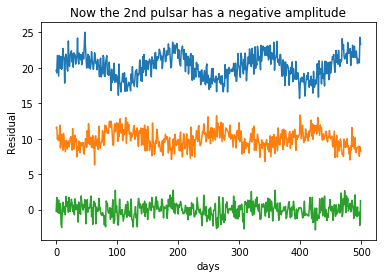

In [9]:
b=-b  # Send b the the negative of b
plt.plot(x, a+20)
plt.plot(x, b+10)
plt.plot(x, c)
plt.xlabel("days")
plt.ylabel("Residual")
plt.title("Now the 2nd pulsar has a negative amplitude")
plt.savefig("noise9.png")

What do you expect the correlation to look like now?

In [10]:
print (np.sum(a*b), "  <- That's the correlation of a with b.")
print (np.sum(b*c), "  <- That's the correlation of b with c.")
print (np.sum(a*c), "  <- That's the correlation of a with c.")

-538.341399230706   <- That's the correlation of a with b.
-96.505397836812   <- That's the correlation of b with c.
191.80005614324597   <- That's the correlation of a with c.


So the correlations with b are now negative, instead of positive. 

# Punchline #2
**Positive correlation means on average the two arrays being correlated both are positive and both are negative at the same time. Negative correlation means if one array is positive, the other is negative, on average.**

Let's add more noise and see if we can meet the challenge:

In [11]:
a += np.random.normal(loc=0, scale=4, size=nsample)
b += np.random.normal(loc=0, scale=4, size=nsample)
c += np.random.normal(loc=0, scale=4, size=nsample)

Text(0.5,1,'The earth term + a lot of noise from 3 different pulsars')

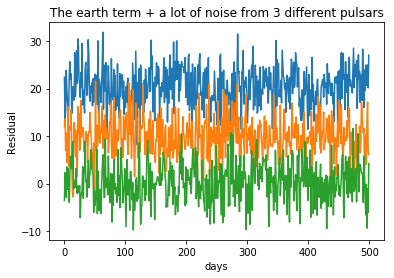

In [12]:
plt.plot(x, a+20)
plt.plot(x, b+10)
plt.plot(x, c)
plt.xlabel("days")
plt.ylabel("Residual")
plt.title("The earth term + a lot of noise from 3 different pulsars")

So that's 5 times as much noise as the last plot. The highest signal to noise ratio is in the top pulsar is .5, and the lowest S/N is .1.  That's a bit more like what we're dealing with.  The green one is a bit more like what we're dealing with.

Let's see how the correlations turn out.

In [13]:
print (np.sum(a*b), "  <- That's the correlation of a with b.")
print (np.sum(b*c), "  <- That's the correlation of b with c.")
print (np.sum(a*c), "  <- That's the correlation of a with c.")

-288.24770265463985   <- That's the correlation of a with b.
-315.8972001723675   <- That's the correlation of b with c.
708.9793326070702   <- That's the correlation of a with c.


But notice it's still (usually) true that the correlations with pulsar b are negative, a and c together are positive.  So you can use that as a way of detecting the background.  

# Punchline #2 (extended dance mix)
**Positive correlation means on average the two arrays being correlated both are positive and both are negative at the same time. Negative correlation means if one array is positive, the other is negative, on average.  This method works pretty well in the presence of white noise.  The noise averages out after summing up over all the samples.**

Now that you've got the hang of correlations between pulsar pairs, let's see what this Hellings and Downs curve is... first take a look at Figure 7 in the NANOGrav 11-year GWB paper:
https://nanograv.github.io/11yr_stochastic_analysis/

# Punchline #3 (Giving away the punchline before the joke.)
**The Hellings and Downs curve tells you about the expected correlation between pairs of pulsars as a function of the angle between them.**

This is kind of an overkill way to make the Hellings and Downs curve, but it's a function that Sydney Dorman and I made for her "mixed Pulsar Timing Array" project (see her poster next week!). It creates a fictitious pulsar timing array of any size out of a realistic distribution of galactic pulsars and gives you the positions, RMSs, and distances of the pulsars.  We then use those pulsars, compute the theoretical correlation between any pair of them, and populate the Hellings an Downs curve for that array.

In [14]:
# pdf(p) is a function that tells you how many pulsars to expect
# in the ATNF catalog with a particular period p. 
def pdf(p):
    a = 97.60496343
    b = -0.19209883
    c = 3.67223529
    w = -0.50236392
    f = 26.98127139
    i = -2.40440718
    j = 0.22678823
    return a*np.exp(-((p-b)/w)**2) + f*np.exp(-((p-i)/j)**2) + c
# mag finds the magnitude of xyz (distance of the pulsars) 
def mag(x,y,z):
    return np.sqrt(x**2 + y**2 + z**2)
def hd(x,y,z,i,j,mags):  #This returns the Hellings and Downs coefficient
    # for pulsar i and j
    # Compute cos(Omega) for the designated pair of pulsars
    cosOm =  (x[i]*x[j] + y[i]*y[j] + z[i]*z[j])/(mags[i]*mags[j])
    w = (1 - cosOm)/2
    return (w*np.log(w) - w/6 + 1/3)

In [15]:
def makePTA(Npulsars):
     # Npulsars is the number of pulsars in your pre-rejected array
     # They are drawn from the distribution in function pdf(periods)
    # Set "nsample" to be about 10x higher than the size of the array
    # you actually want. You may need to adjust this if it can't
    # get enough sigmas in the distribution (you'll get the an
    # error message telling you to adjust it)
    nsample=10*Npulsars
    periods = np.random.uniform(low=0, high=1.0, size=nsample)
    h = np.random.uniform(low=0, high =1.0, size = nsample) # This array is just what
    # we use pdf() to do rejection sampling
    keep = np.where(h < pdf(periods))

    if (np.size(keep) >= Npulsars):
        pulsarperiods = (periods[keep])[0:Npulsars]
    else:
        print("You need to adjust nsample to be larger. You're")
        print("rejecting so many pulsars that you don't have enough")
        print("leftover.")
        raise ValueError("You need to adjust nsample to be larger. You're rejecting so many pulsars that you don't have enough leftover")

    # Set the sigma (RMS) of each equal to a milliperiod
    sigmas = 1e-3*pulsarperiods
    # Draw their positions randomly, but with a realistic
    # relationship to our position in the galaxy. It's a 3
    # step procedure:
    # ***Step 1***
    # Throw down pulsars in galactocentric cylindrical 
    # coordinates, r, theta, phi, according to known properties
    # of the galaxy
    scaleheight = 500 # pc
    radialscale = 3800 # https://arxiv.org/abs/astro-ph/9710197, https://arxiv.org/abs/astro-ph/9710197
    # pulsars are uniformly distributed in theta
    thetas = np.random.uniform(low=0, high=2*np.pi, size=nsample)
    # pulsars are gaussian distributed in z
    zees = np.random.normal(loc=0, scale=scaleheight, size=nsample)
    # pulsars are gaussian distributed in r
    rs = np.random.normal(loc=0, scale=radialscale, size=nsample)
    # ***Step 2 and 3***
    # convert to xyz galactocentric (all in pc)
    # translate to the sun - x -> x - xsun
    xs = rs*np.cos(thetas) - 8000 #sun to earth is 8kpc
    ys = rs*np.sin(thetas)
    zs = zees
    mags = np.sqrt(xs**2 + ys**2 + zs**2) 
    # return 5 arrays: x,y,z positions, RMSs (sigmas), mags (distances)
    return xs[0:Npulsars], ys[0:Npulsars], \
    zs[0:Npulsars], sigmas[0:Npulsars], mags[0:Npulsars] 

Text(0,0.5,'Correlation between pairs of pulsars')

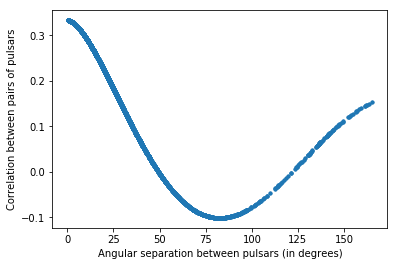

In [16]:
xs, ys, zs, sigmas, mags = makePTA(100)
N = np.size(xs)
ch = []
om = []
for ii in range(N):
    for jj in range(N):
        if jj != ii:
            chiij= hd(xs,ys,zs,ii,jj,mags)
            cosOm = (xs[ii]*xs[jj] + ys[ii]*ys[jj] + zs[ii]*zs[jj])\
                /(mags[ii]*mags[jj])
            Om = np.arccos(cosOm)
            ch.append(chiij)
            om.append(Om)

plt.plot(180/np.pi*np.array(om),ch,'.')
plt.xlabel("Angular separation between pulsars (in degrees)")
plt.ylabel("Correlation between pairs of pulsars")

# Punchline #3
**That's the Hellings and Downs curve!  You'll see and hear about that a bunch.  It tells you about the expected correlation between pairs of pulsars as a function of the angle between them.**

Now that you understand the importance of the Hellings and Downs curve, and of correlations, let's see if I can convince you that red noise is an issue we need to deal with in using pulsars to detection gravitational waves.

# Punchline #4 (giving away the punchline again)
**Red noise is something we need to deal with in using pulsars
to detect gravitational waves.**
As you start talking about tempoNest and Enterprise tomorrow, you'll start to see noise models for pulsars that won't just include this white noise I've added here (as normally distributed noise). You'll 
see red noise.  So let's make sure you know what that looks like, and that you see how much trouble it causes.

Let's start back with those same 3 pulsars, with the white noise....

And now let's add red noise. We'll use a noise model with a power spectrum= $A^2f^{-\gamma}$. The important feature of this noise spectrum that has higher amplitude at lower frequency.  To get from $A^2f^{-\gamma}$ to a noisey timeseries we
* multiply by df, the interval between the frequencies
* take the square root
* randomize the amplitude to make a more realistic spectrum
* take the inverse Fourier transform

In [17]:
def rednoise(A, gamma, nsample):
    # Written by Andrea Lommen and Jeff Hazboun 11 June 2019
    # Create time series noise that has a power spectrum
    # given by amplitude A, and spectral index gamma 
    f = np.arange(1,nsample+1)   # Create a list of 500 frequencies
    # Create the real amplitudes of the power spectrum
    # and add in the random phases (random number between 0 and pi)
    # psd = Af^{gamma}
    df = np.diff(f)
    df = np.append(df[0],df) # Figuring out the spacing of the freqs
    psd= A**2*pow(f, gamma)*df
    # Take the square root of the power spectral density to get
    # amplitude density, and multiply by a random number to 
    # create a realistic (rather than ideal) spectrum. The normally
    # distributed random numbers ensure the amplitudes will be
    # distributed correctly around the idealized spectrum.
    sqrtpsd = np.sqrt(psd) * np.random.randn(nsample)
    # Return the fourier transform, which is the timeseries
    return (np.fft.irfft(sqrtpsd))[:nsample], sqrtpsd, 1/(f[-1]-f[0]), 1/(2*df[0])


# To change the spectral index of the noise change gamma in the next cell

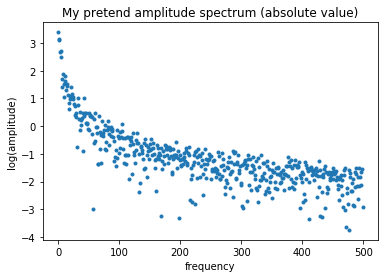

In [18]:
gamma = -13./3.     #   <- 13/3 is what we expect for the GWB
amplitude = 10000   # the amplitude of the spectrum
# Call the function defined above:
noise_timeseries, sqrtpsd, dt, T=rednoise(amplitude, gamma, nsample)
# What do those look like?
plt.plot(np.log10(np.abs(sqrtpsd)), '.')
plt.xlabel("frequency")
plt.ylabel("log(amplitude)")
plt.title("My pretend amplitude spectrum (absolute value)")
plt.savefig("noise16.png")

What do those look like?

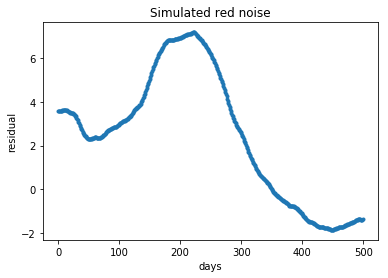

In [19]:
# What do those look like?
plt.plot(noise_timeseries, '.')
plt.xlabel("days")
plt.ylabel("residual")
plt.title("Simulated red noise")
plt.savefig("noise17.png")

What do they do to our correlations?
Let's go back to our perfect residuals, and just add a little bit of white noise.

Text(0.5,1,'The earth term plus modest white noise from 3 different pulsars')

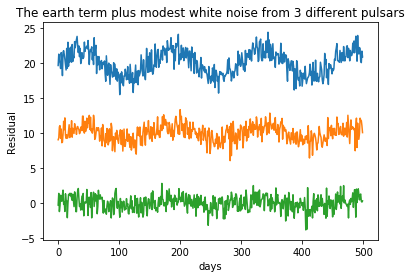

In [20]:
x=np.arange(0,nsample)
a=2.0*np.sin(x*2*np.pi/150)
b=np.sin(x*2*np.pi/150)
c=.5*(np.sin(x*2*np.pi/150))
a += np.random.normal(loc=0, scale=1, size=nsample)
b += np.random.normal(loc=0, scale=1, size=nsample)
c += np.random.normal(loc=0, scale=1, size=nsample)
plt.plot(x, a+20)
plt.plot(x, b+10)
plt.plot(x, c)
plt.xlabel("days")
plt.ylabel("Residual")
plt.title("The earth term plus modest white noise from 3 different pulsars")

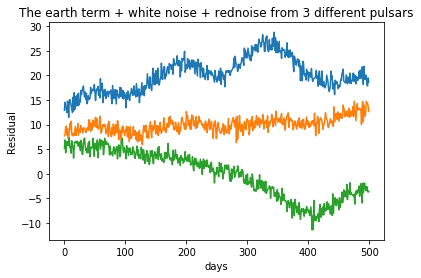

In [21]:
# And now let's add some red noise.
a+=np.real((rednoise(amplitude, gamma, nsample))[0])
b+=np.real((rednoise(amplitude, gamma, nsample))[0])
c+=np.real((rednoise(amplitude, gamma, nsample))[0])
# And remove the mean
a = a - np.mean(a)
b = b - np.mean(b)
c = c - np.mean(c)
plt.plot(x, a+20)
plt.plot(x, b+10)
plt.plot(x, c)
plt.xlabel("days")
plt.ylabel("Residual")
plt.title("The earth term + white noise + rednoise from 3 different pulsars")
plt.savefig("noise18.png")

In [22]:
print (np.sum(a*b), "  <- That's the correlation of a with b.")
print (np.sum(b*c), "  <- That's the correlation of b with c.")
print (np.sum(a*c), "  <- That's the correlation of a with c.")

864.4996057477083   <- That's the correlation of a with b.
-1853.326255086501   <- That's the correlation of b with c.
-3832.5469557447077   <- That's the correlation of a with c.


So now, if you try to use this correlation property to tell whether something is correlated or anti-correlated, the red noise is going to make it really hard.

# Punchline #4
**Red noise is something we need to deal with in using pulsars
to detect gravitational waves.**

# Let's make some white noise using the rednoise function, just for demonstration purposes.
All we do is set $\gamma=0$ and call rednoise.

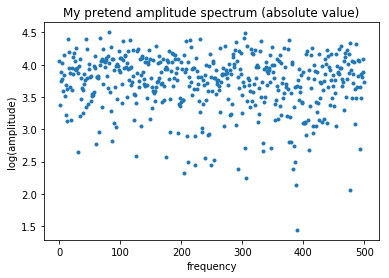

In [23]:
gamma = 0    #   <- 0 for white noise
amplitude = 10000   # the amplitude of the spectrum
# Call the rednoise function defined above:
noise_timeseries, sqrtpsd, dt, T=rednoise(amplitude, gamma, nsample)
# What do those look like?
plt.plot(np.log10(np.abs(sqrtpsd)), '.')
plt.xlabel("frequency")
plt.ylabel("log(amplitude)")
plt.title("My pretend amplitude spectrum (absolute value)")
plt.savefig("whitenoisespectrum.png")


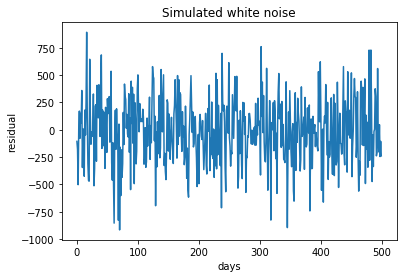

In [24]:
# What do those look like?
plt.plot(noise_timeseries)
plt.xlabel("days")
plt.ylabel("residual")
plt.title("Simulated white noise")
plt.savefig("whitenoisetimeseries.png")